In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split

data = pd.read_excel('`../preprocessing/`Dry_Bean_Dataset.xlsx')
# data.head()

In [2]:
X = data.drop(columns = ['Class'])
y = data['Class']

# label_encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [3]:
# how can i show the label corresponding to the encoded number?
print(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6]))

label_counts = y.value_counts().sort_index()
print(label_counts)

print(f"Count of data:{y.size}")
# From label_counts we could know how many data we could used
# DERMASON and SIRA have the most data, but from the following model training process we could know that its classification accuracy is not very high.

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
Name: count, dtype: int64
Count of data:13611


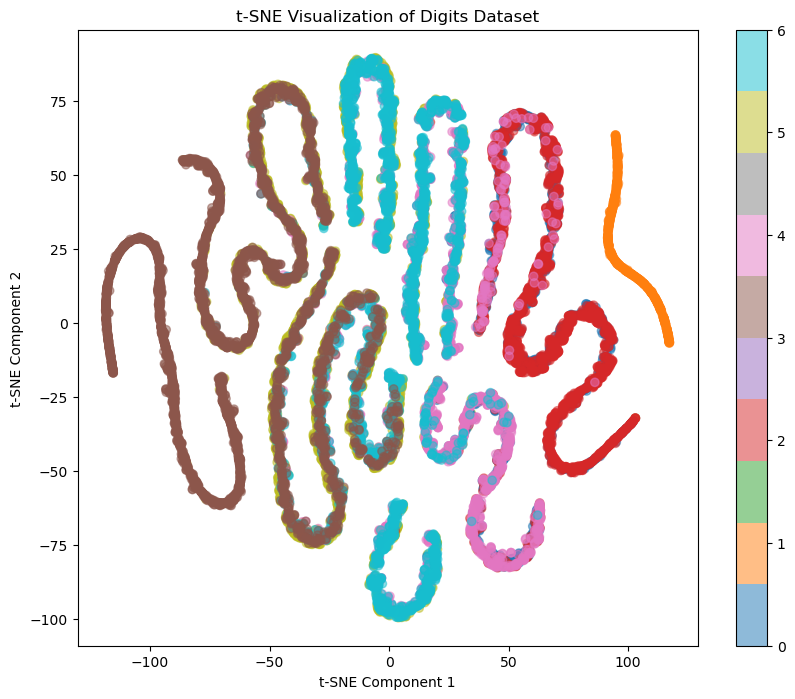

In [7]:
# Try visulization using t-SNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# from sklearn.datasets import load_digits

tsne = TSNE(n_components=2, random_state=42)
# transform the data to 2D
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_encoded, cmap='tab10', alpha=0.5)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
# 丑，标签的覆盖率高，得不到什么有效信息
# 自然就会想到分标签表示数据分布

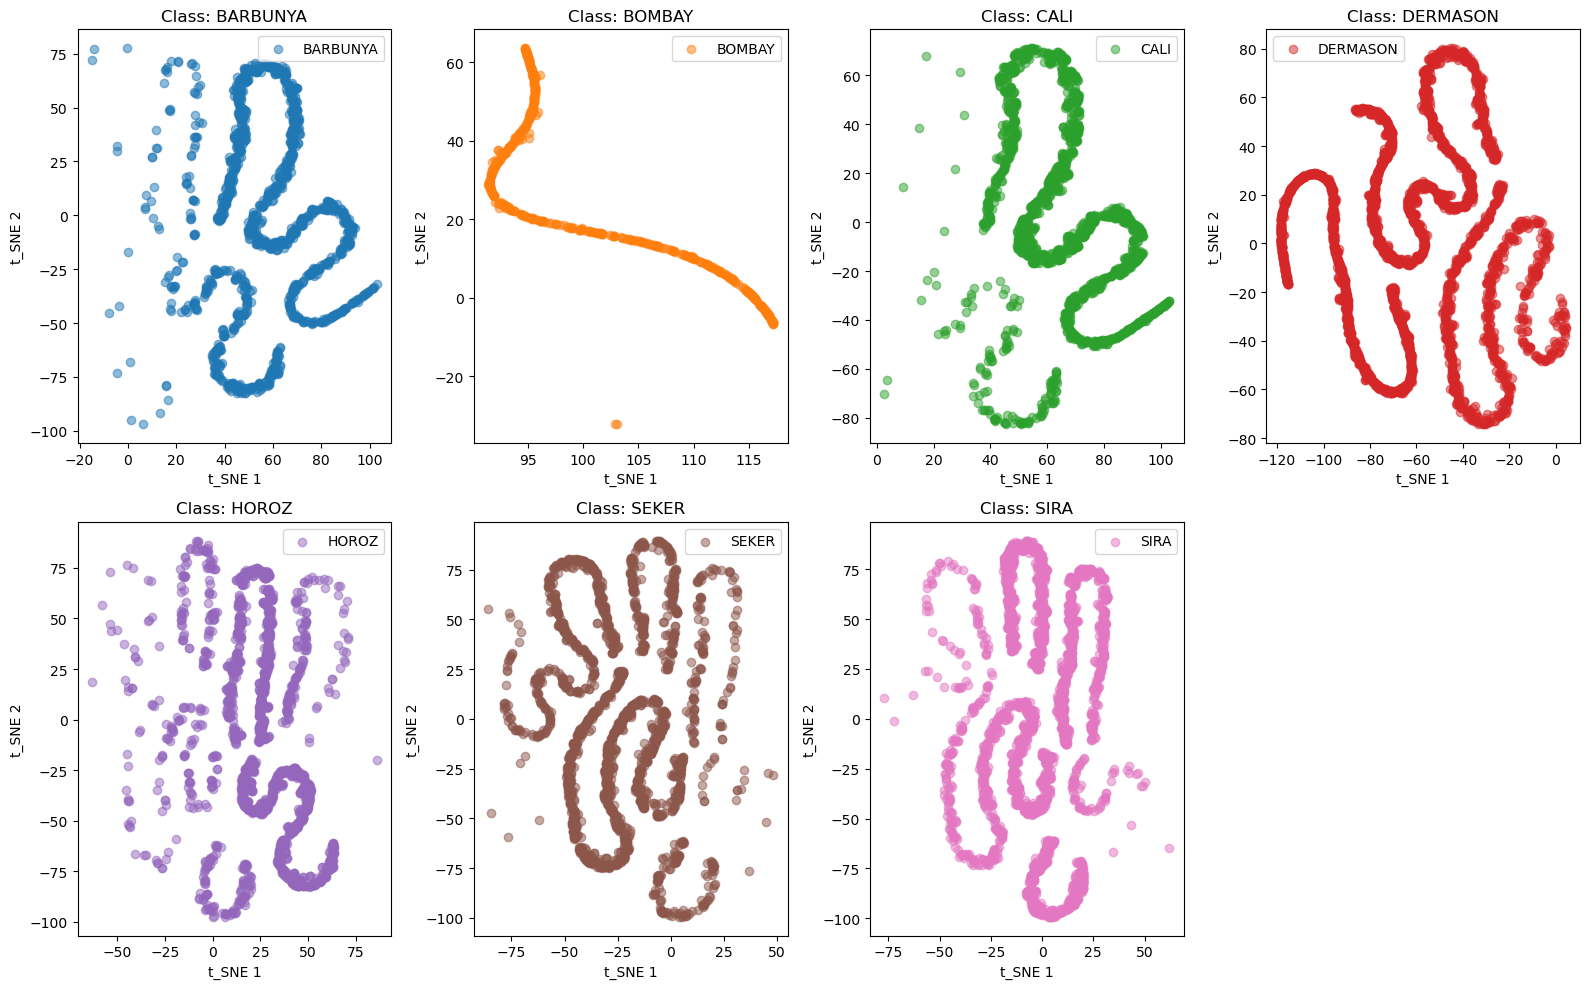

In [10]:
# Try visulization using t-SNE
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize = (16, 10))
axes = axes.ravel()

class_names = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

for i in range(7):
    ax = axes[i]
    mask = (y_encoded == i)

    scatter = ax.scatter(
        X_embedded[mask, 0],
        X_embedded[mask, 1],
        c = [plt.cm.tab10(i)],
        alpha = 0.5,
        label = class_names[i]
    )

    ax.set_title(f"Class: {class_names[i]}")
    ax.set_xlabel('t_SNE 1')
    ax.set_ylabel('t_SNE 2')
    ax.legend()

axes[-1].axis('off')

plt.tight_layout()
plt.show()

# 本来是想映射单独的y，来获得不同标签在空间中的相对位置以更好区分，
# 但发现每个图像的x与y坐标的“标尺”都不一样，同时了解到t-SNE在同时优化所有类别样本和单独优化映射的目标是不一样的，单独优化没有意义
# 因此应该先进行标准化，再进行t—SNE的映射，再在不同图中绘制样本的位置
# 这样就能保证样本的相对位置是有意义的，同时保证xy轴坐标相同，不会出现在图像显示的坐标范围内没有某个标签的数据点的情况。



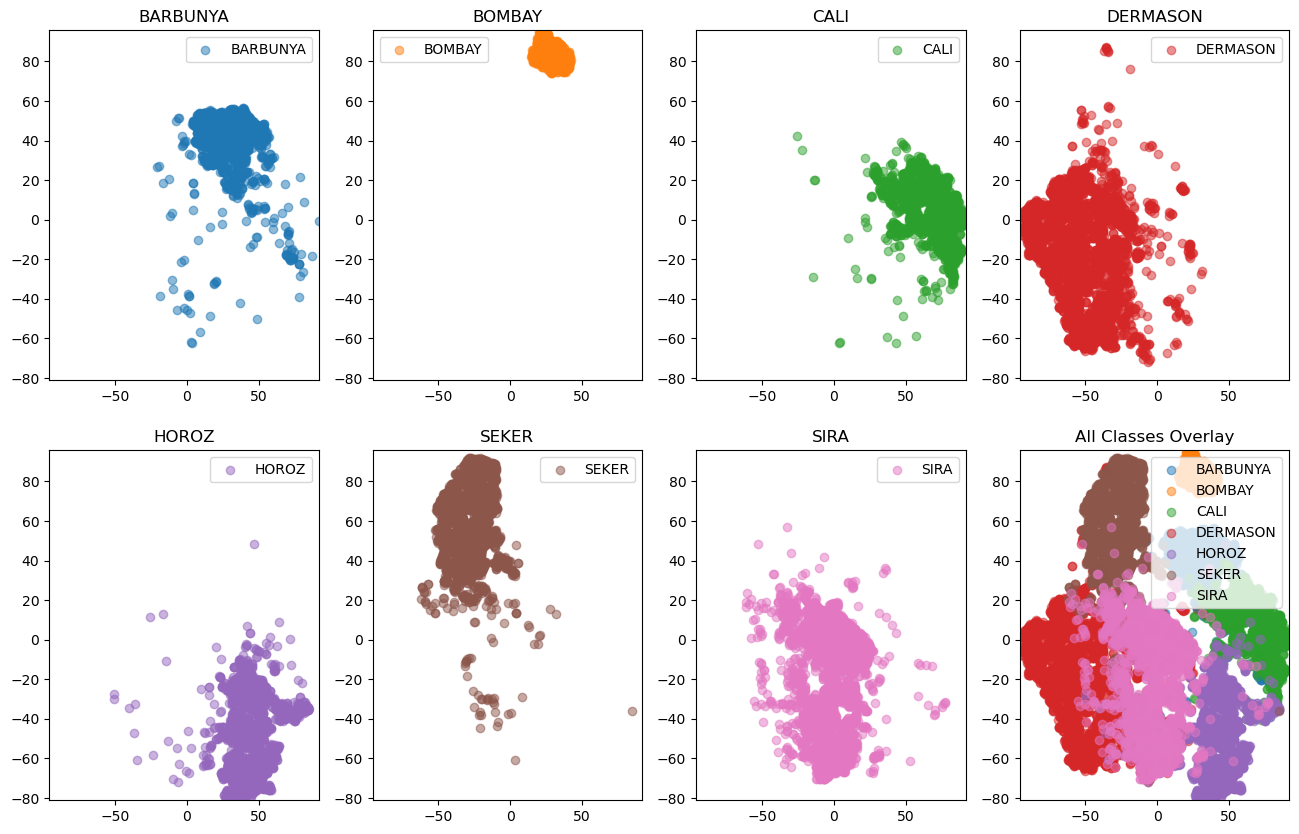

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 对所有标准化的特征进行映射
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_scaled) 

fig, axes = plt.subplots(2, 4, figsize = (16, 10))
axes = axes.ravel()

for i, name in enumerate(class_names):
    ax = axes[i]
    mask = (y_encoded == i)
    ax.scatter(X_embedded[mask, 0], X_embedded[mask, 1], c = [plt.cm.tab10(i)], alpha = 0.5, label = name)
    ax.set_title(name)
    ax.set_xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max())
    ax.set_ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max())
    ax.legend()

ax = axes[-1]
for i, name in enumerate(class_names):
    mask = (y_encoded == i)
    ax.scatter(X_embedded[mask, 0], X_embedded[mask, 1], c = [plt.cm.tab10(i)], alpha = 0.5, label = name)
ax.set_title("All Classes Overlay")
ax.set_xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max())
ax.set_ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max())
ax.legend()

# plt.tight_layout()
plt.show()

# 可以看到xy轴是相同的尺度了，类别的区别都比较明显，不过边界比较模糊
# 同时有些类别是超级好区分的：比如BOMBAY
# 有一些pairs边界较模糊：(BARBUNYA, CALI)，(SIRA, DERMASON)，(SEKER, DERMASON)，可能需要着重区分。

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, shuffle=True)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

y_pred = lr_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy:.4f}")

model_evaluation_metrics = {}

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

model_evaluation_metrics = {
    'Confusion Matrix': conf_matrix,
    'Classification Report': classif_report
}

print(f"Logistic Regression Evaluation Metrics:")
print("Confusion Matrix:")
print(tabulate(conf_matrix, headers=lr_classifier.classes_, tablefmt='grid'))
print("\nClassification Report:")
print(classif_report)


# From the result we could know: 
# using logistic regression, what kind of result can we get
# what classes is harder to classified: e.g.3&6, 相对来说准确率比较低
# From the support we can also get what? 不同种类的训练数据的数量是不一样的

Accuracy: 0.9229
Logistic Regression Evaluation Metrics:
Confusion Matrix:
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   1 |   2 |   3 |   4 |   5 |   6 |
+=====+=====+=====+=====+=====+=====+=====+
| 360 |   0 |  22 |   0 |   0 |   2 |  11 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 | 161 |   0 |   0 |   0 |   0 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|  19 |   0 | 445 |   0 |   7 |   2 |   6 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   0 |   0 | 941 |   1 |  18 |  83 |
+-----+-----+-----+-----+-----+-----+-----+
|   3 |   0 |   5 |   5 | 560 |   0 |  15 |
+-----+-----+-----+-----+-----+-----+-----+
|   9 |   0 |   0 |   9 |   0 | 582 |  19 |
+-----+-----+-----+-----+-----+-----+-----+
|   1 |   0 |   1 |  57 |  10 |  10 | 720 |
+-----+-----+-----+-----+-----+-----+-----+

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       395
           1       1.00      1.00      1.00 

In [17]:
# logistic regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, shuffle=True)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# After the polynomial transformation
scaler = StandardScaler().fit(X_train_poly)
X_train_scaled = scaler.transform(X_train_poly)
# print(X_train_scaled)
X_test_scaled = scaler.transform(X_test_poly)

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

y_pred = lr_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy:.4f}")

model_evaluation_metrics = {}

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

model_evaluation_metrics = {
    'Confusion Matrix': conf_matrix,
    'Classification Report': classif_report
}

print(f"Logistic Regression Evaluation Metrics:")
print("Confusion Matrix:")
print(tabulate(conf_matrix, headers=lr_classifier.classes_, tablefmt='grid'))
print("\nClassification Report:")
print(classif_report)


Accuracy: 0.9248
Logistic Regression Evaluation Metrics:
Confusion Matrix:
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   1 |   2 |   3 |   4 |   5 |   6 |
+=====+=====+=====+=====+=====+=====+=====+
| 365 |   0 |  22 |   0 |   0 |   0 |   8 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 | 161 |   0 |   0 |   0 |   0 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|  19 |   0 | 444 |   0 |   8 |   2 |   6 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   0 |   0 | 942 |   2 |  15 |  84 |
+-----+-----+-----+-----+-----+-----+-----+
|   2 |   0 |   6 |   3 | 560 |   0 |  17 |
+-----+-----+-----+-----+-----+-----+-----+
|   7 |   0 |   0 |  11 |   0 | 583 |  18 |
+-----+-----+-----+-----+-----+-----+-----+
|   1 |   0 |   1 |  57 |   9 |   9 | 722 |
+-----+-----+-----+-----+-----+-----+-----+

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       395
           1       1.00      1.00      1.00 

c:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# SVM
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, shuffle=True)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with poly kernel
clf1 = svm.SVC(kernel = "poly", C = 100, probability=True)
clf1.fit(X_train_scaled, y_train)
y_pred_1 = clf1.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy:.4f}")


# SVM with rbf kernel
clf2 = svm.SVC(kernel = "rbf", C = 10, probability=True)
clf2.fit(X_train_scaled, y_train)
y_pred_2 = clf2.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9319
Accuracy: 0.9339


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, shuffle=True)

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
}

# Initialize the SVM model
svc = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9293

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       395
           1       1.00      1.00      1.00       161
           2       0.94      0.94      0.94       479
           3       0.92      0.93      0.92      1043
           4       0.97      0.95      0.96       588
           5       0.96      0.95      0.96       619
           6       0.88      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.95      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

